# Sensitivity Study



## Setup



### Add dependency paths



In [1]:
import sys

sys.path.append('C:\\Users\\John\\repos\\st7py')
sys.path.append('C:\\Users\\John\\repos\\st7py\\lib')


### Get info from model

Get element totals and node coordinates. 

In [2]:
import st7py as st7
import numpy as np
from settings import *

# load api
st7.start()

# create instance of model and open 
model = st7.Model(filename=ST7_FILE, 
                  scratch=ST7_SCRATCH, 
                  uid=1)
model.open()

# get element totals
totals = model.totals(disp=True)

# get node coordinates (as a  numpy array)
coords = [st7.macros.get_coord(1, node) for node in range(1, totals['Nodes']+1)]
coords = np.array(coords)

# close model and unload api
model.close()
st7.stop()


St7API initialized
Element totals:
		Nodes: 1333
		Beams: 132
		Plates: 1056
		Bricks: 0
St7API released


## Run in parallel 



* 7 models ran



TODO: add config file and brief description



### Configuration




In [3]:
%run -t sensitivity "kx_ends"



sensitivity study starting at 1515724794.3584423...
sensitivity studies finished. total elapsed time: 10.739275217056274s

IPython CPU timings (estimated):
  User   :      10.98 s.
  System :       0.00 s.
Wall time:      10.98 s.



## View Results



### Plot Mode Shapes



In [35]:
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_shape_set(coords, shapes, freqs, scale=50, figtitle='Results'):
    
    fig = plt.figure(figsize=(12,12))
    
    fig.suptitle(figtitle, fontsize=22)
    
    for mode in np.arange(4):

        ax = fig.add_subplot(2,2,mode+1, projection='3d')

        # 3d scatter of superimposed modal nodal displacements
        #  colormapped to Z-dir
        ax.scatter(coords[:,0]+shapes[:,0,mode] * scale, 
                   coords[:,1]+shapes[:,1,mode] * scale, 
                   coords[:,2]+shapes[:,2,mode] * scale,
                   c=coords[:,2]+shapes[:,2,mode]*scale,
                   cmap = cm.gist_ncar)

        plt.title('Mode {}:  {} Hz'.format(mode+1, freqs[mode]))
        
    plt.show()
    

Choose which result set to plot...

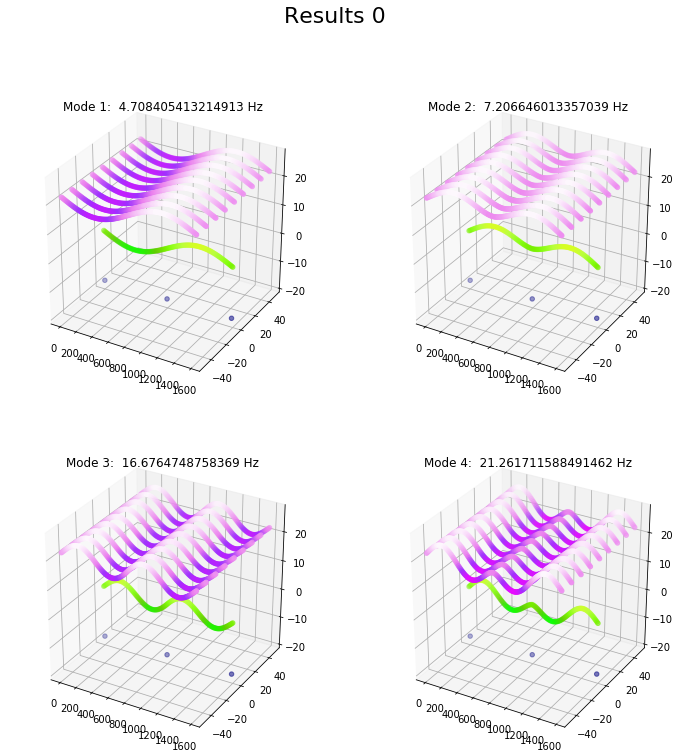

In [37]:

resultid = 0

# index results
freqs = results[resultid][0]
shapes = results[resultid][1]
value = results[resultid][2]

# plot mode shapes 
plot_shape_set(coords, shapes, freqs, scale=50, figtitle='Results {}'.format(resultid))


### Extract Results

Unzip (or reverse zip) the results list for more homogenious data types. This groups the results better.

In [72]:

# get parameter values
# "unzip" or reverse zip the results
r = list(zip(*results))

freqs = np.array(r[0])
shapes = np.array(r[1])
values = np.array(r[2])


### Plot Frequency Sensitivity 



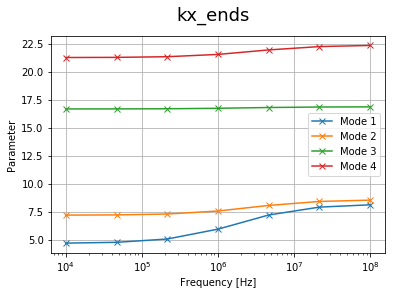

In [121]:
fig = plt.figure()
fig.suptitle('kx_ends', fontsize=18)

ax = fig.add_subplot(111)

# semilog plot for each mode in freqs (column index)
[ax.semilogx(values,freqs[:,mode], marker='x', label='Mode {}'.format(mode+1)) for mode in range(freqs.shape[1])]


ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Parameter')
ax.grid('on')

plt.legend()

plt.show()

